<a href="https://colab.research.google.com/github/hane94/Machine-Learning-Practice/blob/master/lesson2_02_sgd(hyeseon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [24]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.8198,  1.0000],
        [ 0.7593,  1.0000],
        [-0.3955,  1.0000],
        [ 0.7940,  1.0000],
        [ 0.1214,  1.0000]])

torch.ones(n,2) -> Rank 2 Tensor 생성 

(n*2) row : n / columns :2


x[:,0] 

: => every single value on that dimension / every single row 

0 => column

x[:,0] = every raw of column 0

In [25]:
a = tensor(3.,2); a

tensor([3., 2.])

tensor means 'array of regualr shape'

Rank :how many dimensions are there?

image - rank 3 tensor




In [0]:
y = x@a + torch.rand(n)

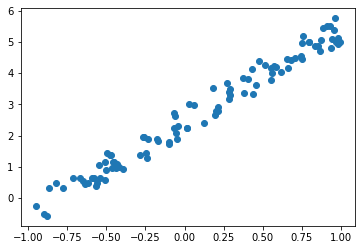

In [27]:
plt.scatter(x[:,0], y);

plotting library 'matplotlib'

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [30]:
a

tensor([-1.,  1.])

In [31]:
y_hat = x@a
mse(y_hat, y)

tensor(8.7425)

matrix product of x and a

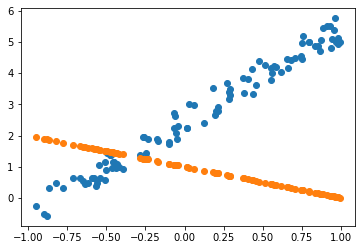

In [32]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [33]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a #calculate y_hat
    loss = mse(y, y_hat) #calculate loss => squared error
    if t % 10 == 0: print(loss)
    loss.backward() #calculate gradient (backward() method calaulates the gradient in pytorch)
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [47]:
lr = 1e-1
for t in range(100): update() #loop 100 times

tensor(8.7425, grad_fn=<MeanBackward0>)
tensor(1.2855, grad_fn=<MeanBackward0>)
tensor(0.3822, grad_fn=<MeanBackward0>)
tensor(0.1585, grad_fn=<MeanBackward0>)
tensor(0.1004, grad_fn=<MeanBackward0>)
tensor(0.0853, grad_fn=<MeanBackward0>)
tensor(0.0814, grad_fn=<MeanBackward0>)
tensor(0.0804, grad_fn=<MeanBackward0>)
tensor(0.0801, grad_fn=<MeanBackward0>)
tensor(0.0800, grad_fn=<MeanBackward0>)


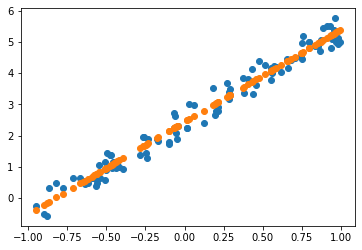

In [48]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [50]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach()) #update y data
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.